## Importando as bibliotecas necessárias

In [63]:
import pandas as pd

## Carregando o arquivo CSV com os dados dos passageiros

In [64]:
passageiros=pd.read_csv("raw-data/passageiros.csv")

## Visualizando as primeiras linhas dos dados

In [65]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


## Importando a biblioteca Seaborn

In [66]:
import seaborn as sns

## Configurando o tamanho e as fontes das figuras

In [67]:
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 20

## Criando um gráfico de linha para visualizar a quantidade de passageiros ao longo do tempo

<Axes: xlabel='tempo', ylabel='passageiros'>

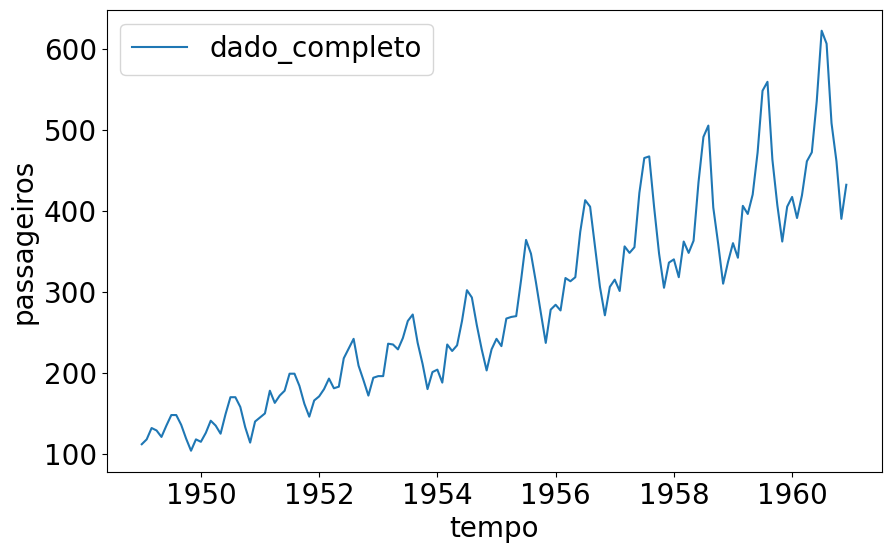

In [68]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")

## Importando o StandardScaler da biblioteca Scikit-learn para escalonamento dos dados

In [69]:
from sklearn.preprocessing import StandardScaler

## Instanciando o StandardScaler

In [70]:
sc=StandardScaler()

## Ajustando o StandardScaler aos dados

In [71]:
sc.fit(passageiros)

StandardScaler()

## Normalizando os dados

In [72]:
dado_normalizado=sc.transform(passageiros)

## Separando os dados normalizados em variáveis x e y

In [73]:
x=dado_normalizado[:,0]
y=dado_normalizado[:,1]

## Importando o Matplotlib para visualização

In [74]:
import matplotlib.pyplot as plt

## Plotando os dados normalizados em um gráfico de linha

Text(0.5, 0, 'Data')

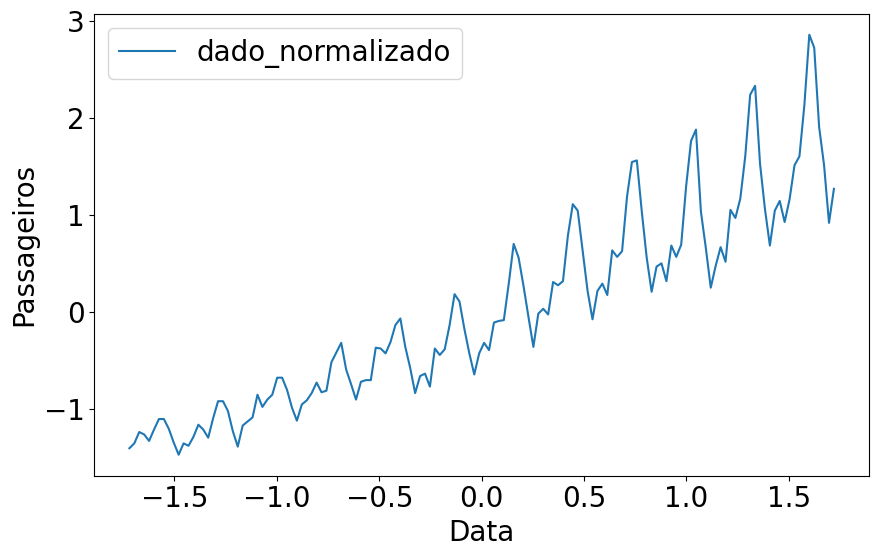

In [75]:
sns.lineplot(x=x, y=y, label="dado_normalizado")
plt.ylabel("Passageiros")
plt.xlabel("Data")

## Definindo os tamanhos de treino e teste

In [76]:
size_treino=int(len(passageiros)*0.9)
size_teste=len(passageiros)-size_treino

## Separando os dados de treino

In [77]:
x_treino=x[0:size_treino]
y_treino=y[0:size_treino]

## Separando os dados de teste

In [78]:
x_teste=x[size_treino:len(passageiros)]
y_teste=y[size_treino:len(passageiros)]

## Plotando os dados de treino e teste

Text(0.5, 0, 'Data')

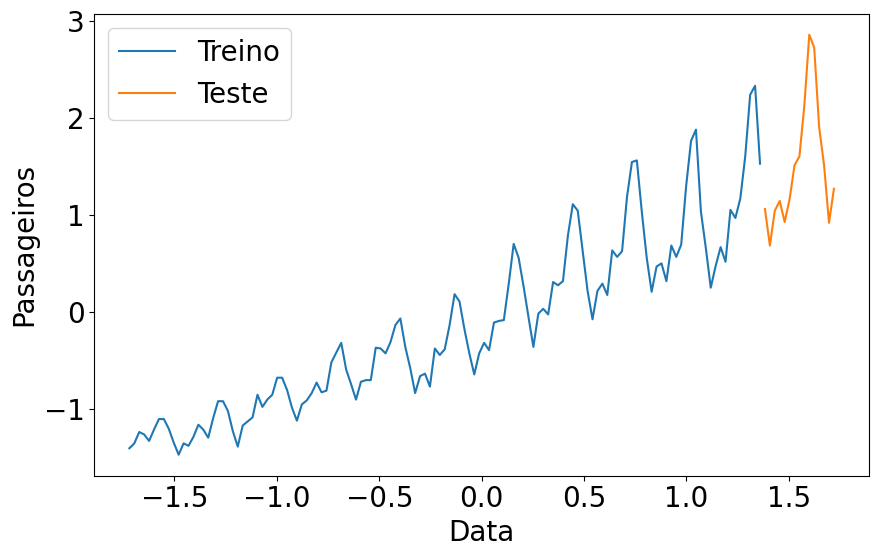

In [79]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_teste, y=y_teste, label="Teste")
plt.ylabel("Passageiros")
plt.xlabel("Data")

## Importando as classes Sequential e Dense do TensorFlow

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Criando uma instância do modelo Sequential
Aqui estamos criando um modelo sequencial, que será usado para empilhar camadas de uma rede neural.

In [81]:
regressor=Sequential()

## Adicionando uma camada densa com ativação linear
Aqui estamos adicionando uma camada densa ao modelo, com 1 neurônio e ativação linear. O kernel é inicializado com valores "Ones" e a camada não utiliza bias.

In [89]:
regressor.add(Dense(1, input_dim=1, kernel_initializer="Ones", activation="linear", use_bias=False))

## Compilando o modelo
Nesta célula, o modelo é compilado com a função de perda mean squared error (erro quadrático médio) e o otimizador adam, que ajustará os pesos durante o treinamento.

In [83]:
regressor.compile(loss="mean_squared_error", optimizer="adam")

## Exibindo o resumo do modelo
Aqui, o método summary é usado para visualizar a arquitetura do modelo, incluindo o número de parâmetros treináveis em cada camada.

In [84]:
regressor.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

## Treinando o modelo
Nesta célula, o modelo é treinado com os dados de treino x_treino e y_treino.

In [85]:
regressor.fit(x_treino, y_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1281  


## Fazendo previsões com o modelo
Aqui estamos utilizando o método predict para gerar as previsões com base nos dados de treino.

In [90]:
y_pred=regressor.predict(x_treino)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


## Plotando o resultado do treino e as previsões
Nesta célula, são plotados os valores reais do treino e as previsões geradas pelo modelo em um gráfico de linha para comparação.

<Axes: >

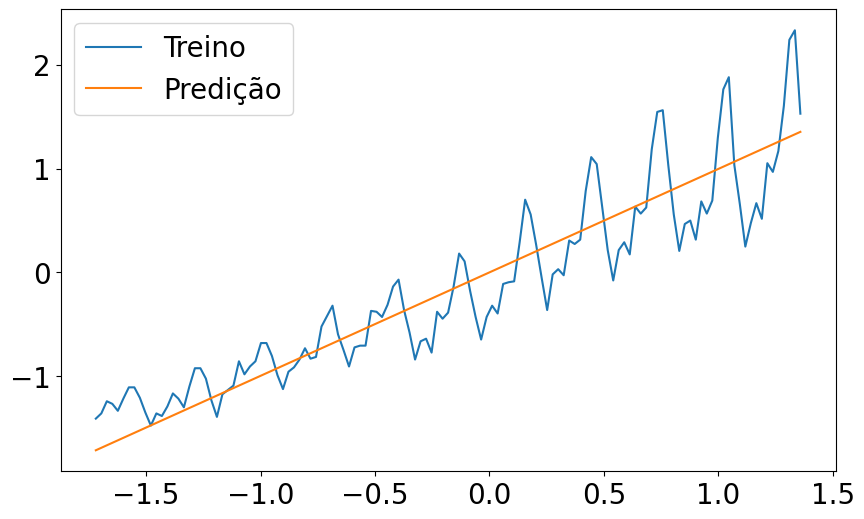

In [91]:
sns.lineplot(x=x_treino, y=y_treino, label="Treino")
sns.lineplot(x=x_treino, y=y_pred[:,0], label="Predição")

## Criando um dicionário com os dados para o DataFrame

In [92]:
d={"Tempo": x_treino, "Passageiros": y_pred[:,0]}

## Criando um DataFrame com o dicionário de dados

In [93]:
resultado=pd.DataFrame(data=d)

## Exibindo o DataFrame resultante

In [94]:
resultado

,Tempo,Passageiros
0,-1.720064,-1.712556
1,-1.696007,-1.688604
2,-1.671950,-1.664652
3,-1.647894,-1.640700
4,-1.623837,-1.616748
...,...,...
124,1.262984,1.257471
125,1.287041,1.281423
126,1.311098,1.305375
127,1.335155,1.329327


## Aplicando a transformação inversa para voltar à escala original
Nesta célula, estamos utilizando inverse_transform para aplicar a transformação inversa no DataFrame resultado, retornando os valores à escala original.

In [95]:
resultado_transf=sc.inverse_transform(resultado)

## Criando um DataFrame com os dados transformados
Aqui, criamos um DataFrame com os dados transformados para a escala original, armazenando em resultado_transf.

In [97]:
resultado_transf=pd.DataFrame(resultado_transf)

## Renomeando as colunas do DataFrame transformado
Nesta célula, estamos renomeando as colunas de resultado_transf para "Tempo" e "Passageiros" para que elas correspondam aos nomes das colunas do DataFrame original.

In [98]:
resultado_transf.columns=["Tempo", "Passageiros"]

## Plotando os dados originais e ajustados
Aqui, utilizamos o seaborn.lineplot para plotar os dados originais de passageiros e o ajuste de treino em dois gráficos de linha distintos para comparação.

<Axes: xlabel='tempo', ylabel='passageiros'>

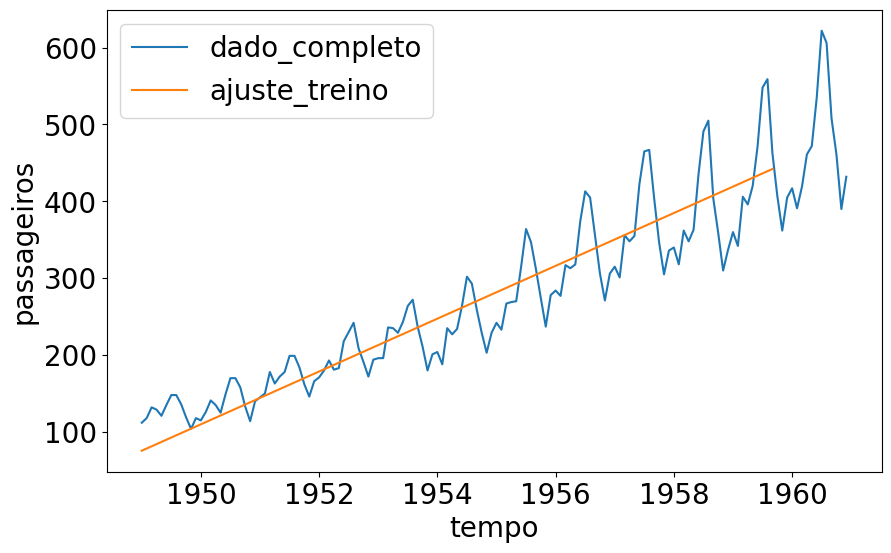

In [109]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")
sns.lineplot(x="Tempo", y="Passageiros", data=resultado_transf, label="ajuste_treino")

## Fazendo previsões com os dados de teste

In [110]:
y_pred_teste=regressor.predict(x_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


## Criando um dicionário com as previsões do teste
Nesta célula, criamos um dicionário com as colunas "Tempo" e "Passageiros", onde "Tempo" contém os dados de x_teste e "Passageiros" contém as previsões de y_pred_teste.

In [111]:
d={"Tempo": x_teste, "Passageiros": y_pred_teste[:,0]}
resultado_teste=pd.DataFrame(data=d)

## Aplicando a transformação inversa aos dados de teste
Aqui aplicamos a função inverse_transform ao DataFrame de teste para retornar os dados à escala original.

In [112]:
resultado_transf_teste=sc.inverse_transform(resultado_teste)

## Criando um DataFrame com os dados transformados do teste
Nesta célula, criamos um novo DataFrame com os dados de teste transformados, armazenando-o como resultado_transf_teste.

In [113]:
resultado_transf_teste=pd.DataFrame(resultado_transf_teste)

## Renomeando as colunas do DataFrame de teste transformado

In [114]:
resultado_transf_teste.columns=["Tempo", "Passageiros"]

## Plotando os dados reais, o ajuste de treino e as previsões do teste
Nesta célula, são gerados gráficos de linha com os dados reais, o ajuste de treino e as previsões feitas sobre os dados de teste, permitindo comparar os três conjuntos de dados.

<Axes: xlabel='tempo', ylabel='passageiros'>

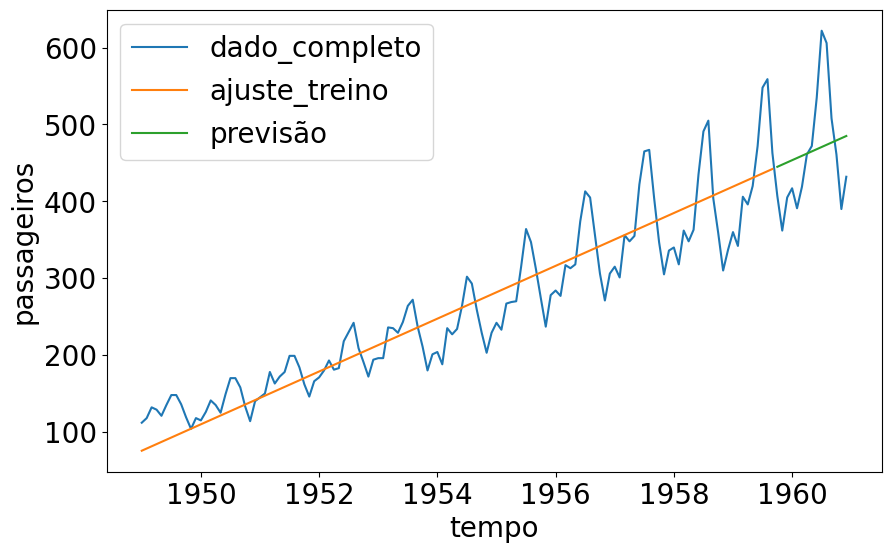

In [116]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")
sns.lineplot(x="Tempo", y="Passageiros", data=resultado_transf, label="ajuste_treino")
sns.lineplot(x="Tempo", y="Passageiros", data=resultado_transf_teste, label="previsão")